In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
sns.set(font_scale=1.4)

## Sentiment Classifier -- SVC

              precision    recall  f1-score   support

         0.0       0.70      0.84      0.77      3291
         1.0       0.66      0.46      0.55      2190

    accuracy                           0.69      5481
   macro avg       0.68      0.65      0.66      5481
weighted avg       0.69      0.69      0.68      5481



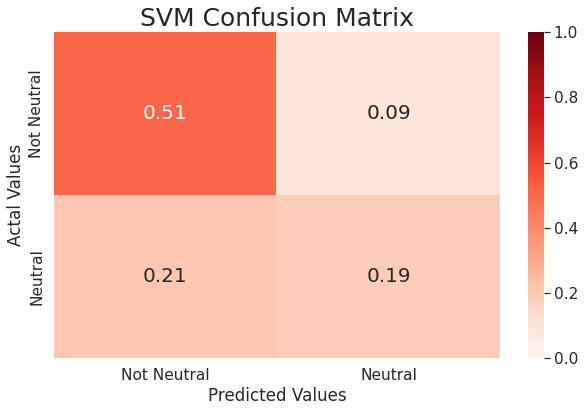

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      3764
         1.0       0.76      0.50      0.60      1717

    accuracy                           0.79      5481
   macro avg       0.78      0.71      0.73      5481
weighted avg       0.79      0.79      0.78      5481



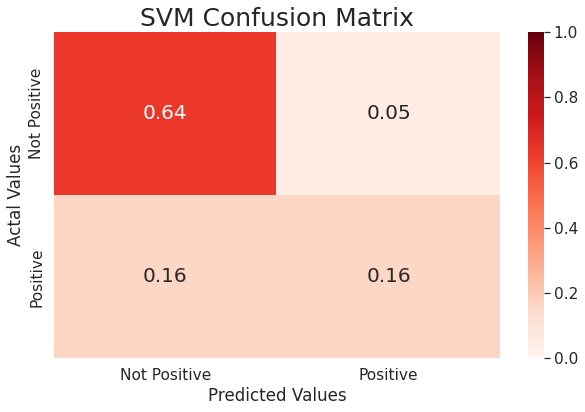

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86      3913
         1.0       0.70      0.39      0.50      1568

    accuracy                           0.78      5481
   macro avg       0.75      0.66      0.68      5481
weighted avg       0.77      0.78      0.75      5481



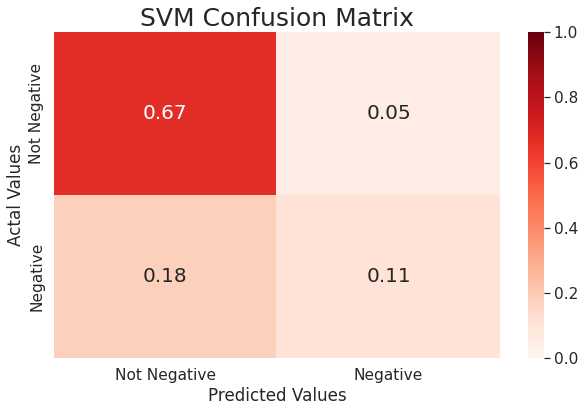

In [4]:
y_true = np.load("/content/drive/MyDrive/Sentiment Analysis/Sentiment Classifier/clean_data/true_value.npy")
y_pred = np.load("/content/drive/MyDrive/Sentiment Analysis/Sentiment Classifier/clean_data/pred_value.npy")
y_pred = np.where(y_pred < 0.5, 0.0, 1.0)
class_names = ["neutral", "positive", "negative"]


for idx, name in enumerate(class_names[:]):
    print(metrics.classification_report(y_true[idx], y_pred[idx]))

    cm = metrics.confusion_matrix(y_true[idx], y_pred[idx])
    total = np.sum(cm)
    cm = np.round(cm / total, 2)

    cm_df = pd.DataFrame(cm, index=[f"Not {name.title()}", f"{name.title()}"],
                              columns=[f"Not {name.title()}", f"{name.title()}"])
    
    plt.figure(figsize=(10,6))
    sns.heatmap(cm_df, annot=True, fmt='.2g', annot_kws={"size": 20}, cmap="Reds", vmin=0, vmax=1)
    plt.title('SVM Confusion Matrix', size=25)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [ ]:
print(metrics.precision_score(y_true[1], y_pred[1]))

0.7564444444444445


## Sentiment Classifier -- Neural Network

In [5]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100
EPOCHS = 50

In [6]:
# Import embeddings
features = np.load("/content/drive/MyDrive/Sentiment Analysis/Sentiment Classifier/clean_data/train_embedding.npy")
df = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/Sentiment Classifier/clean_data/cleaned_train.csv")
df = df[df["text"].notna()].reset_index(drop=True)

labels = np.empty((0, 3))
for index, row in df.iterrows():
   text = row["sentiment"]

   if (text == "neutral"):
      lst = [1,0,0]
   elif (text == "positive"):
      lst = [0,1,0]
   else: lst = [0,0,1]
   
   labels = np.append(labels, np.array(lst, dtype="float64").reshape(1,-1), axis=0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Convert to dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_ds = train_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)

In [7]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Sentiment Analysis/models/neural-network-sentiment-classification")

In [8]:
predictions = model.predict(X_test)
pred = np.zeros_like(predictions)
pred[np.arange(len(predictions)), predictions.argmax(1)] = 1

def convert(lst):
    res = []
    for i in range(lst.shape[0]):
        if (lst[i][0] == 1): res.append("neutral")
        elif (lst[i][1] == 1): res.append("positive")
        else: res.append("negative")
    return res

y_true = convert(y_test)
y_pred = convert(pred) 

172/172 [==============================] - 1s 1ms/step


In [ ]:
print(metrics.classification_report(y_true, y_pred, labels=["neutral", "positive", "negative"]))

              precision    recall  f1-score   support

     neutral       0.57      0.73      0.64      2224
    positive       0.69      0.58      0.63      1682
    negative       0.65      0.50      0.57      1575

    accuracy                           0.62      5481
   macro avg       0.64      0.61      0.61      5481
weighted avg       0.63      0.62      0.62      5481



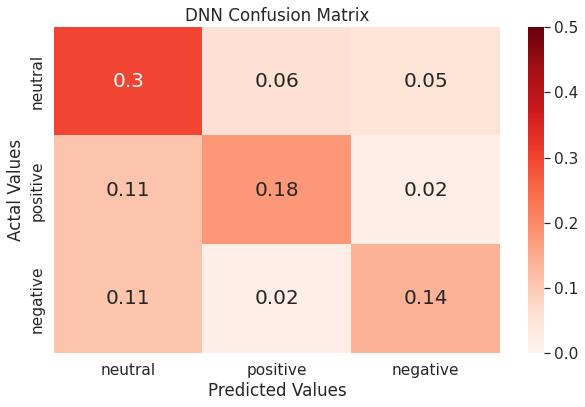

In [12]:
cm = metrics.confusion_matrix(y_true, y_pred, labels=["neutral", "positive", "negative"])
total = np.sum(cm)
cm = np.round(cm / total, 2)
cm_df = pd.DataFrame(cm,
                     index = ["neutral", "positive", "negative"], 
                     columns = ["neutral", "positive", "negative"])
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True,fmt='.2g', annot_kws={"size": 20}, cmap="Reds", vmin=0, vmax=0.5)
plt.title('DNN Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Toxic comment classifier -- SVC

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       182
         1.0       0.94      1.00      0.97      3063

    accuracy                           0.94      3245
   macro avg       0.47      0.50      0.49      3245
weighted avg       0.89      0.94      0.92      3245



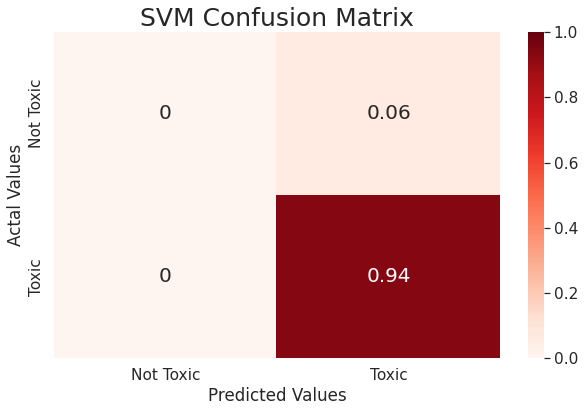

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      2902
         1.0       0.71      0.10      0.17       343

    accuracy                           0.90      3245
   macro avg       0.81      0.55      0.56      3245
weighted avg       0.88      0.90      0.87      3245



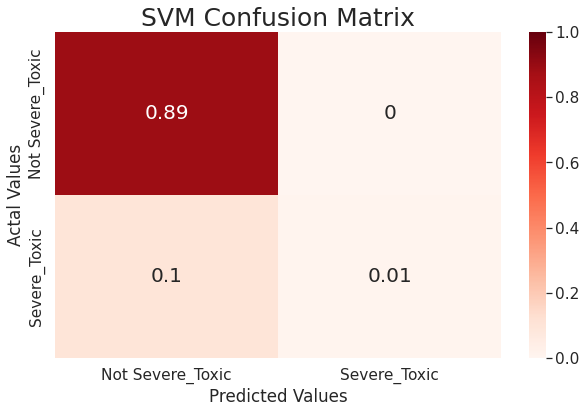

              precision    recall  f1-score   support

         0.0       0.73      0.78      0.75      1551
         1.0       0.78      0.73      0.76      1694

    accuracy                           0.75      3245
   macro avg       0.76      0.76      0.75      3245
weighted avg       0.76      0.75      0.75      3245



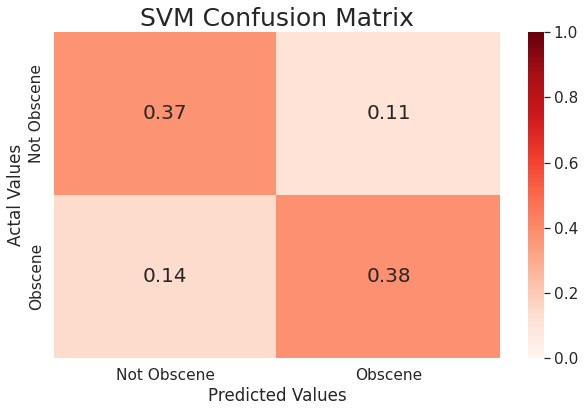

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3169
         1.0       0.59      0.13      0.22        76

    accuracy                           0.98      3245
   macro avg       0.78      0.56      0.60      3245
weighted avg       0.97      0.98      0.97      3245



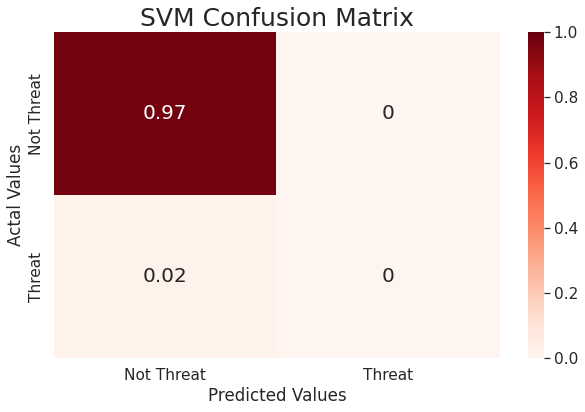

              precision    recall  f1-score   support

         0.0       0.67      0.72      0.69      1670
         1.0       0.68      0.62      0.65      1575

    accuracy                           0.67      3245
   macro avg       0.67      0.67      0.67      3245
weighted avg       0.67      0.67      0.67      3245



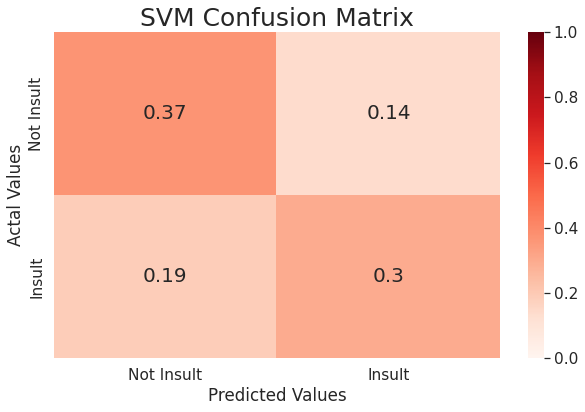

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      2927
         1.0       0.51      0.12      0.19       318

    accuracy                           0.90      3245
   macro avg       0.71      0.55      0.57      3245
weighted avg       0.87      0.90      0.87      3245



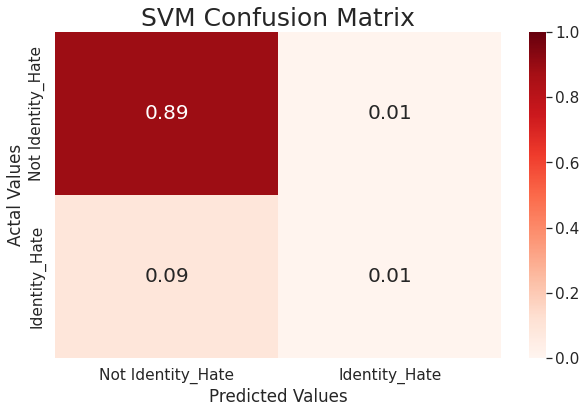

In [13]:
y_true = np.load("/content/drive/MyDrive/Sentiment Analysis/Toxic Comment Classifier/clean_data/true_value.npy")
y_pred = np.load("/content/drive/MyDrive/Sentiment Analysis/Toxic Comment Classifier/clean_data/pred_value.npy")
y_pred = np.where(y_pred < 0.5, 0.0, 1.0)
class_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

for idx, name in enumerate(class_names[:]):
    print(metrics.classification_report(y_true[idx], y_pred[idx]))

    cm = metrics.confusion_matrix(y_true[idx], y_pred[idx])
    total = np.sum(cm)
    cm = np.round(cm / total, 2)
    cm_df = pd.DataFrame(cm, index=[f"Not {name.title()}", f"{name.title()}"],
                              columns=[f"Not {name.title()}", f"{name.title()}"])
    
    plt.figure(figsize=(10,6))
    sns.heatmap(cm_df, annot=True, fmt='.2g', annot_kws={"size": 20}, cmap="Reds", vmin=0, vmax=1)
    plt.title('SVM Confusion Matrix', size=25)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

## Toxic comment classifier -- Neural network

In [14]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100
EPOCHS = 2

In [15]:
class_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Import embeddings and labels
features = np.load("/content/drive/MyDrive/Sentiment Analysis/Toxic Comment Classifier/clean_data/train_embedding.npy")
df = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/Toxic Comment Classifier/clean_data/cleaned_train.csv")
df = df[df["comment_text"].notna()].reset_index(drop=True)

new_df = df[(df["toxic"] == 1) | (df["severe_toxic"] == 1) | (df["obscene"] == 1) | (df["threat"] == 1) | (df["insult"] == 1) | (df["identity_hate"] == 1)]

features = features[new_df.index.values]
labels = new_df[class_names].values

print(features.shape, labels.shape)
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Convert to dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_ds = train_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)

(16225, 256) (16225, 6)


In [ ]:
new_df.shape

(16225, 9)

In [16]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Sentiment Analysis/models/toxic-neural-network-updated")

In [17]:
predictions = model.predict(X_test)
predictions = np.where(predictions < 0.5, 0.0, 1.0)

102/102 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       202
           1       0.94      1.00      0.97      3043

    accuracy                           0.94      3245
   macro avg       0.47      0.50      0.48      3245
weighted avg       0.88      0.94      0.91      3245



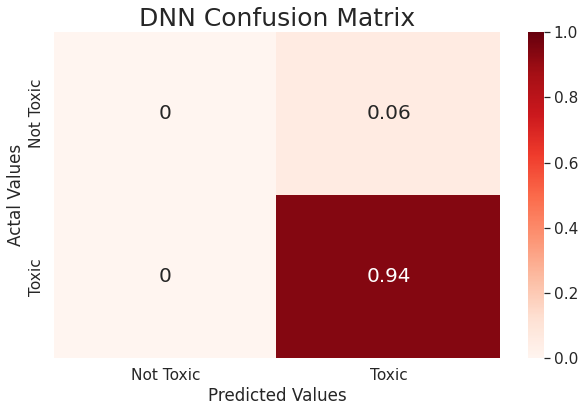

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2920
           1       0.63      0.13      0.21       325

    accuracy                           0.91      3245
   macro avg       0.77      0.56      0.58      3245
weighted avg       0.88      0.91      0.88      3245



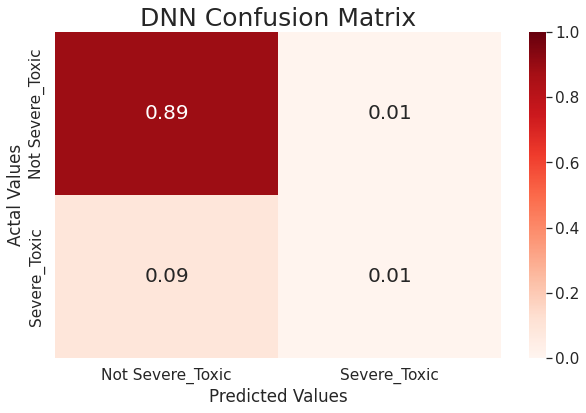

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1527
           1       0.76      0.74      0.75      1718

    accuracy                           0.74      3245
   macro avg       0.74      0.74      0.74      3245
weighted avg       0.74      0.74      0.74      3245



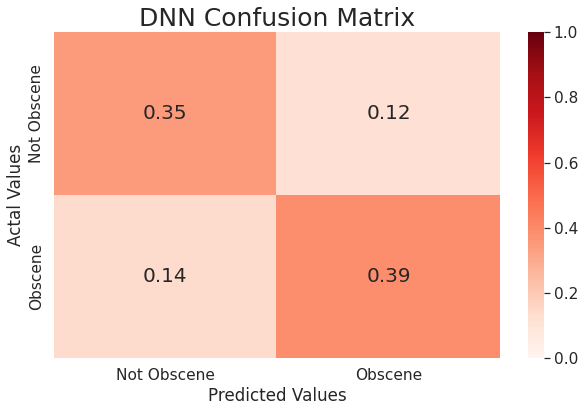

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3143
           1       1.00      0.01      0.02       102

    accuracy                           0.97      3245
   macro avg       0.98      0.50      0.50      3245
weighted avg       0.97      0.97      0.95      3245



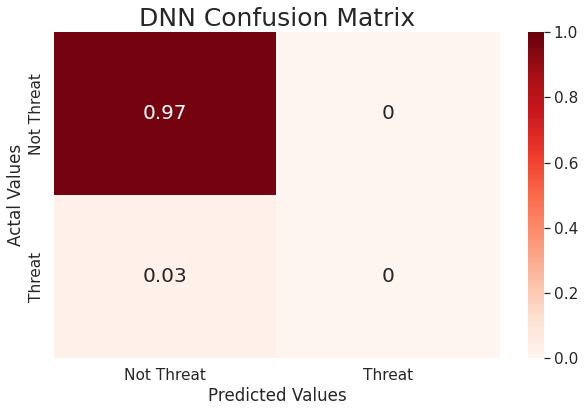

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1665
           1       0.71      0.58      0.64      1580

    accuracy                           0.68      3245
   macro avg       0.69      0.68      0.68      3245
weighted avg       0.69      0.68      0.68      3245



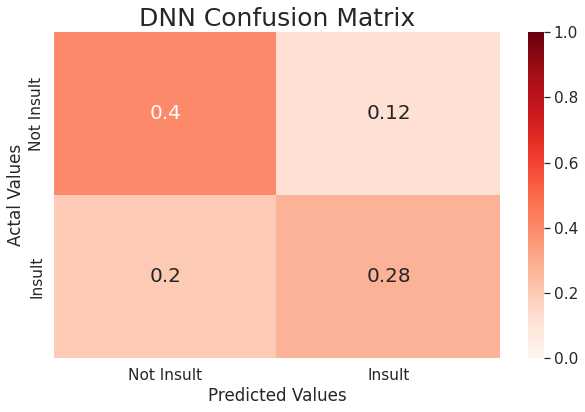

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2964
           1       0.57      0.08      0.14       281

    accuracy                           0.92      3245
   macro avg       0.75      0.54      0.55      3245
weighted avg       0.89      0.92      0.89      3245



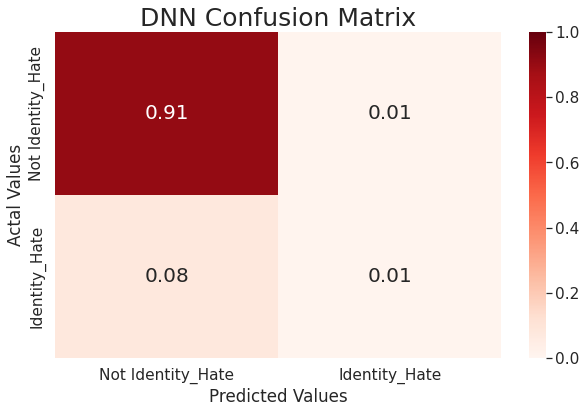

In [18]:
for idx, matrix in enumerate(metrics.multilabel_confusion_matrix(y_test, predictions)):
    print(metrics.classification_report(y_test[:,idx], predictions[:,idx], zero_division=0))
    name = class_names[idx]
    total = np.sum(matrix)
    matrix = np.round(matrix / total, 2)
    cm_df = pd.DataFrame(matrix, index=[f"Not {name.title()}", f"{name.title()}"],
                              columns=[f"Not {name.title()}", f"{name.title()}"])
    
    plt.figure(figsize=(10,6))
    sns.heatmap(cm_df, annot=True, fmt='.2g', annot_kws={"size": 20}, cmap="Reds", vmin=0, vmax=1)
    plt.title('DNN Confusion Matrix', size=25)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
